**ЗАВДАННЯ 1**

In [1]:
import pandas as pd
import numpy as np

# Читаємо CSV файл за допомогою pandas
df = pd.read_csv('youtube.csv', encoding='latin-1')

In [2]:
df_head_5 = df.head(5)
print(df_head_5)

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US  

In [3]:
print(df.shape)

(995, 28)


In [4]:
# Перевірка пропусків і підрахунок їх кількості в кожному стовпці
missing_values = df.isna().sum()

# Виведення кількості пропусків у кожному стовпці
print("Кількість пропусків у кожному стовпці:")
print(missing_values)

# Заміна пропусків на NaN і зміна типу даних на числовий
df = df.fillna(np.nan)

# Перевірка кожного стовпця на наявність np.nan
for column in df.columns:
    if df[column].isna().any():
        try:
            df[column] = df[column].astype(float)
        except: 
            pass

# Виведення інформації про типи даних після змін
print(df.dtypes)

Кількість пропусків у кожному стовпці:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month        

In [5]:
# Знаходимо стовпці, які мають хоча б одне NaN значення
columns_with_nan = df.columns[df.isna().any()].tolist()

# Замінюємо NaN на середні значення тільки для вибраних стовпців
for column in columns_with_nan:
    # Перевіряємо тип даних стовпця (якщо це float або int)
    if np.issubdtype(df[column].dtype, np.number):
        column_mean = df[column].mean()
        df[column] = df[column].fillna(column_mean)

print(df)

     rank                    Youtuber  subscribers   video views  \
0       1                    T-Series    245000000  2.280000e+11   
1       2              YouTube Movies    170000000  0.000000e+00   
2       3                     MrBeast    166000000  2.836884e+10   
3       4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4       5                   SET India    159000000  1.480000e+11   
..    ...                         ...          ...           ...   
990   991               Natan por Aï¿     12300000  9.029610e+09   
991   992    Free Fire India Official     12300000  1.674410e+09   
992   993                       Panda     12300000  2.214684e+09   
993   994                 RobTopGames     12300000  3.741235e+08   
994   995                Make Joke Of     12300000  2.129774e+09   

             category                       Title  uploads         Country  \
0               Music                    T-Series    20082           India   
1    Film & Animation      

In [6]:
# Перевірка кількості пропусків у кожному стовпці
missing_values_after = df.isna().sum()

# Виведення кількості пропусків у кожному стовпці після обробки
print("Кількість пропусків у кожному стовпці після обробки:")
print(missing_values_after)

Кількість пропусків у кожному стовпці після обробки:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created

In [7]:
# Підрахунок кількості унікальних країн у колонці "Country"
unique_countries = df['Country'].nunique()

# Виведення кількості унікальних країн
print("Кількість унікальних країн у колонці 'Country':", unique_countries)

Кількість унікальних країн у колонці 'Country': 49


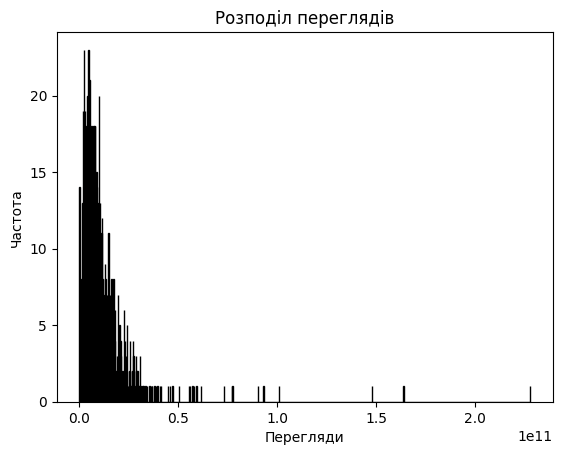

In [8]:
import matplotlib.pyplot as plt

# Кількість елементів у стовпці "Views"
num_elements = len(df['video views'])

# Визначення кількості інтервалів (bins)
bins = int(num_elements)  # Можете вибрати інший спосіб обчислення bins за вашими потребами

# Побудова гістограми розподілу переглядів
df['video views'].plot(kind='hist', bins=bins, edgecolor='black')

# Налаштування назви графіку та осей
plt.title('Розподіл переглядів')
plt.xlabel('Перегляди')
plt.ylabel('Частота')

# Відображення графіку
plt.show()

In [9]:
views_column_name = 'video views'

# Максимальна кількість переглядів
max_views = df[views_column_name].max()

# Мінімальна кількість переглядів
min_views = df[views_column_name].min()

# Середня кількість переглядів
mean_views = df[views_column_name].mean()

# Виведення результатів
print("Максимальна кількість переглядів:", max_views)
print("Мінімальна кількість переглядів:", min_views)
print("Середня кількість переглядів:", mean_views)


Максимальна кількість переглядів: 228000000000.0
Мінімальна кількість переглядів: 0.0
Середня кількість переглядів: 11039537052.03819


In [10]:
# Підрахунок кількості відео для кожної країни
country_counts = df['Country'].value_counts()

# Знаходження країни з найбільшою кількістю відео
most_videos_country = country_counts.idxmax()

# Виведення результату
print("Країна з найбільшою кількістю відео на YouTube:", most_videos_country)

Країна з найбільшою кількістю відео на YouTube: United States


In [11]:
# Знаходження рядка з найбільшою кількістю завантажень
max_uploads_video = df[df['uploads'] == df['uploads'].max()]['Youtuber'].values[0]

# Виведення назви каналу з найбільшою кількістю завантажень
print("Канал з найбільшою кількістю завантажень:", max_uploads_video)

# Знаходження рядка з найменшою кількістю завантажень
min_uploads_video = df[df['uploads'] == df['uploads'].min()]['Youtuber'].values[0]

# Виведення назви каналу з найменшою кількістю завантажень
print("Канал з найменшою кількістю завантажень:", min_uploads_video)

Канал з найбільшою кількістю завантажень: ABP NEWS
Канал з найменшою кількістю завантажень: Music


**ЗАВДАННЯ 2**

In [12]:
from surprise import SVD, SVDpp, NMF
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import matplotlib.pyplot as plt
from surprise import KNNBasic

# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin(name='ml-100k', prompt=False)

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9338  0.9322  0.9378  0.9371  0.9334  0.9349  0.0022  
MAE (testset)     0.7357  0.7355  0.7387  0.7371  0.7378  0.7369  0.0012  
Fit time          0.39    0.42    0.40    0.40    0.40    0.40    0.01    
Test time         0.04    0.07    0.04    0.04    0.07    0.05    0.02    


{'test_rmse': array([0.93381546, 0.93221747, 0.93783455, 0.9370628 , 0.93341288]),
 'test_mae': array([0.73569425, 0.73548509, 0.73866658, 0.73707427, 0.73776684]),
 'fit_time': (0.388718843460083,
  0.4190230369567871,
  0.40435099601745605,
  0.4035649299621582,
  0.40082478523254395),
 'test_time': (0.04166126251220703,
  0.07466006278991699,
  0.04139304161071777,
  0.0371091365814209,
  0.0681459903717041)}

In [13]:
# Розділіть дані на навчальний і тестовий набори за допомогою train_test_split:
trainset, testset = train_test_split(data, test_size=0.25)

In [14]:
# Підберіть найкращі параметри для алгоритмів SVD, SVDpp, NMF та інших алгоритмів за допомогою крос-валідації.
# Для цього використовуйте функцію cross_validate та зберігайте RMSE значення для кожного алгоритму:

user_based_cf = KNNBasic(sim_options={'user_based': True})
item_based_cf = KNNBasic(sim_options={'user_based': False})

algorithms = [SVD(), SVDpp(), NMF(), user_based_cf, item_based_cf]
results = {}

for algo in algorithms:
    algo_key = str(algo.__class__.__name__) + " user_based: " + str(algo.sim_options['user_based'])
    results[algo_key] = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

print(results)


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9328  0.9385  0.9405  0.9385  0.9372  0.9375  0.0026  
Fit time          0.38    0.41    0.41    0.39    0.38    0.39    0.01    
Test time         0.07    0.04    0.04    0.07    0.04    0.05    0.02    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9177  0.9248  0.9136  0.9211  0.9207  0.9196  0.0037  
Fit time          6.25    6.23    6.28    6.18    6.26    6.24    0.03    
Test time         1.34    1.25    1.28    1.26    1.27    1.28    0.03    
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9716  0.9599  0.9594  0.9647  0.9686  0.9648  0.0048  
Fit time          0.49    0.49    0.48    0.48    0.53    0.49    0.02    
Test time         0.03    

In [15]:
# Відображіть результати крос-валідації та визначіть алгоритм з найменшим значенням RMSE.
# Використовуйте оптимальний алгоритм для навчання на всьому наборі даних та зробіть передбачення для тестового набору:

best_algo = SVDpp()  # Замініть це на алгоритм з найкращим RMSE
best_algo.fit(trainset)
predictions = best_algo.test(testset)

RMSE: 0.9219
RMSE on test data: 0.9219081877331291


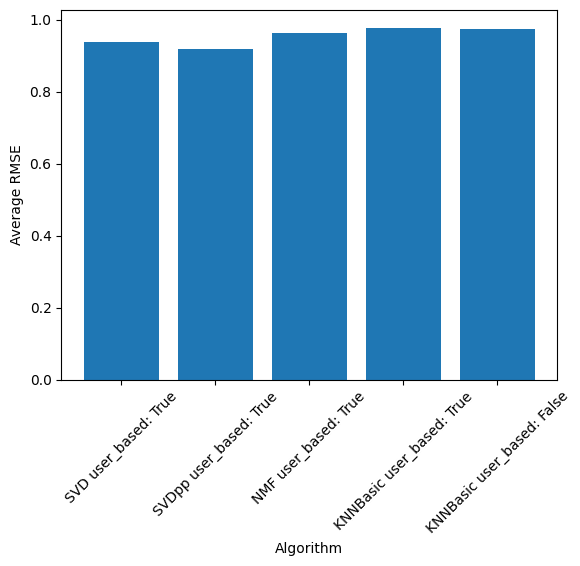

In [16]:
# Розрахуйте RMSE для тестового набору та візуалізуйте результати. Наприклад:

rmse = accuracy.rmse(predictions)
print("RMSE on test data:", rmse)

# Візуалізація результатів крос-валідації
plt.bar(results.keys(), [result['test_rmse'].mean() for result in results.values()])
plt.xlabel('Algorithm')
plt.ylabel('Average RMSE')
plt.xticks(rotation=45)
plt.show()

Висновки:

Крос-валідація є важливою частиною розробки рекомендаційних систем, оскільки вона дозволяє об'єктивно оцінювати ефективність різних алгоритмів на вашому наборі даних.

За результатами крос-валідації можна визначити алгоритм з найменшим значенням RMSE, яке є показником середньої помилки в передбаченнях. У вашому випадку найефективнішим алгоритмом став SVDpp() з найменшим значенням RMSE.

Алгоритми колаборативної фільтрації, такі як user_based_cf та item_based_cf, можуть бути ефективними для побудови рекомендаційних систем, особливо якщо у вас є достатньої кількості інформації про користувачів і предмети.

Важливо враховувати, що ефективність алгоритмів може відрізнятися в залежності від конкретного набору даних та завдання рекомендації. Тому важливо випробувати декілька різних алгоритмів та вибрати найкращий після аналізу результатів крос-валідації.

**ЗАВДАННЯ 3**

In [17]:
# Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

x_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


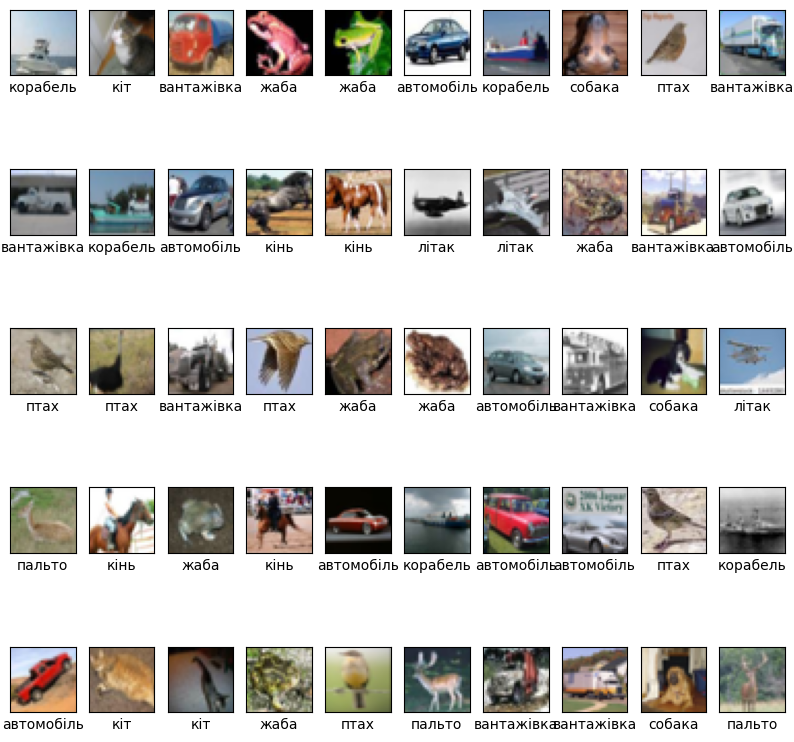

In [18]:
# Завантаження та розділення датасету
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

y_train = y_train.flatten()


classes = ['літак', 'автомобіль', 'птах', 'кіт', 'пальто', 'собака', 'жаба', 'кінь', 'корабель', 'вантажівка']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])



In [19]:
# Нормалізація даних
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Перетворення міток в категоріальні дані
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [20]:
# Будівництво моделі
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Плоский шар для згладжування зображення
    layers.Dense(128, activation="relu"),   # Повністю з'єднаний шар з 128 вузлами
    layers.Dense(64, activation="relu"),    # Повністю з'єднаний шар з 64 вузлами
    layers.Dense(32, activation="relu"),    # Повністю з'єднаний шар з 32 вузлами
    layers.Dense(10, activation="softmax")  # Вихідний шар з 10 вузлами та функцією активації softmax
])

# Компіляція моделі
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Виведення інформації про модель
model.summary()

# Тренування моделі
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 404010 (1.54 MB)
Trainable params: 404010 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1250/1250

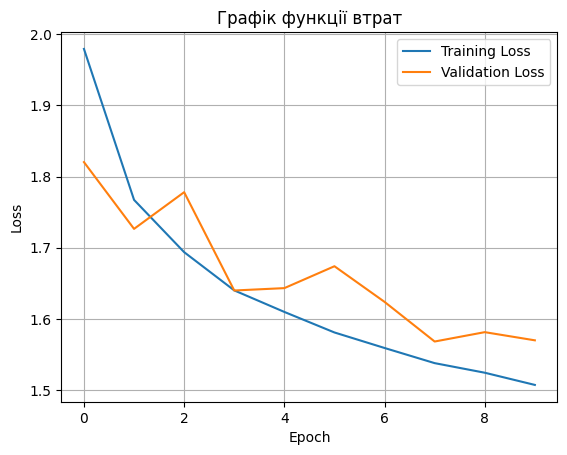

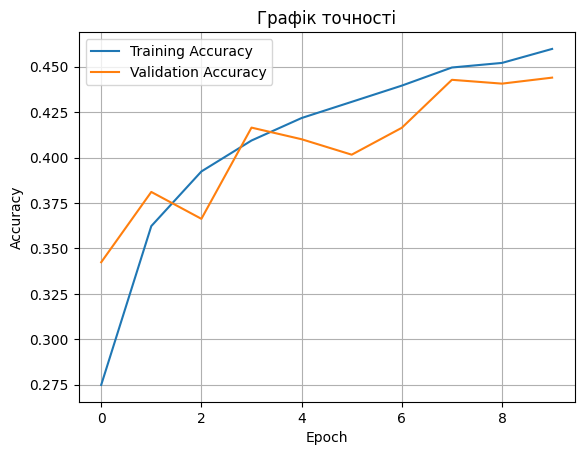

In [21]:
# Виведення графіків функції втрат та точності
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Графік функції втрат")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()



313/313 - 0s - loss: 1.5416 - accuracy: 0.4489 - 215ms/epoch - 686us/step

Test Accuracy: 44.89%
1/1 [==============================] - 0s 35ms/step
Image 1: Predicted Class 6, True Class 3
Image 2: Predicted Class 4, True Class 4
Image 3: Predicted Class 6, True Class 6
Image 4: Predicted Class 7, True Class 3
Image 5: Predicted Class 9, True Class 9
Image 6: Predicted Class 1, True Class 7
Image 7: Predicted Class 8, True Class 1
Image 8: Predicted Class 5, True Class 5
Image 9: Predicted Class 9, True Class 3
Image 10: Predicted Class 7, True Class 7


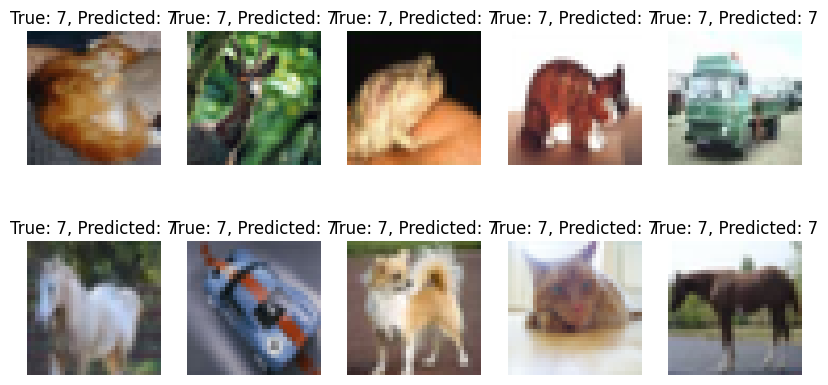

In [23]:
from keras.utils import to_categorical

# Оцінка точності на тестовому наборі
x_test_flat = x_test.reshape((x_test.shape[0], -1))
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, batch_size=32, verbose=2)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

# Розпізнавання 10 випадкових зображень
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)
random_images = x_test[random_indices]
predictions = model.predict(random_images)

# Виведення результатів розпізнавання
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[random_indices[i]])
    print(f"Image {i + 1}: Predicted Class {predicted_class}, True Class {true_class}")

# Виведення зображень для перевірки
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {true_class}, Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

In [24]:
# Виведення статистики моделі
print("\nModel Evaluation:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Статистика параметрів моделі
total_parameters = sum([np.prod(layer.get_weights()[i].shape) for layer in model.layers for i in range(len(layer.get_weights()))])

print(f"\nTotal Parameters: {total_parameters}")

# Статистика шарів моделі
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i + 1}: {layer.name}")
    print(f"Number of Parameters: {layer.count_params()}")
    print(f"Input Shape: {layer.input_shape}, Output Shape: {layer.output_shape}")



Model Evaluation:
Test Loss: 1.5416
Test Accuracy: 44.89%

Total Parameters: 404010

Layer 1: flatten
Number of Parameters: 0
Input Shape: (None, 32, 32, 3), Output Shape: (None, 3072)

Layer 2: dense
Number of Parameters: 393344
Input Shape: (None, 3072), Output Shape: (None, 128)

Layer 3: dense_1
Number of Parameters: 8256
Input Shape: (None, 128), Output Shape: (None, 64)

Layer 4: dense_2
Number of Parameters: 2080
Input Shape: (None, 64), Output Shape: (None, 32)

Layer 5: dense_3
Number of Parameters: 330
Input Shape: (None, 32), Output Shape: (None, 10)


Висновок
В ході цієї лабораторної роботи я отримав багато цінного досвіду та вивчив кілька ключових аспектів роботи з глибоким навчанням та бібліотекою Keras у мові програмування Python:

1. **Завантаження та попередній аналіз даних:**
   - Вивчив, як завантажувати та розділяти датасети за допомогою Keras.
   - Ознайомився з роботою зображень та міток у контексті класифікації.

2. **Побудова та тренування моделі:**
   - Розглянув основи побудови та компіляції нейронних мереж за допомогою Keras.
   - Оптимізував архітектуру моделі для задачі класифікації.
   - Навчився компілювати та тренувати модель, визначаючи важливі параметри, такі як функція втрат та оптимізатор.

3. **Оцінка та аналіз результатів:**
   - Вивчив, як оцінювати модель на тестових даних та отримувати метрики якості, такі як точність та втрати.
   - Аналізував результати тренування, спостерігаючи за змінами в точності та втратах на тренувальному та тестовому наборах.

4. **Шляхи поліпшення та експерименти:**
   - Ознайомився з різними стратегіями поліпшення результатів, такими як оптимізація гіперпараметрів, зміни в архітектурі моделі та попередня обробка даних.
   - Спробував різні оптимізатори та методи регуляризації для покращення тренування та загальної ефективності моделі.